In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Shoe prices.csv to Shoe prices.csv


In [ ]:
import pandas as pd

df = pd.read_csv('Shoe prices.csv') # Corrected filename
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        1006 non-null   object
 1   Model        1006 non-null   object
 2   Type         1006 non-null   object
 3   Gender       1006 non-null   object
 4   Size         1006 non-null   object
 5   Color        1006 non-null   object
 6   Material     1006 non-null   object
 7   Price (USD)  1006 non-null   object
dtypes: object(8)
memory usage: 63.0+ KB


In [ ]:
# Clean 'Price (USD)' column
df['Price (USD)'] = df['Price (USD)'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Price (USD)'] = df['Price (USD)'].astype(float)

# Create 'Quantity' column (assuming 1 per item)
df['Quantity'] = 1

# Calculate 'Total_Sales'
df['Total_Sales'] = df['Price (USD)'] * df['Quantity']

# Display the first few rows and DataFrame information to verify
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Brand        1006 non-null   object 
 1   Model        1006 non-null   object 
 2   Type         1006 non-null   object 
 3   Gender       1006 non-null   object 
 4   Size         1006 non-null   object 
 5   Color        1006 non-null   object 
 6   Material     1006 non-null   object 
 7   Price (USD)  1006 non-null   float64
 8   Quantity     1006 non-null   int64  
 9   Total_Sales  1006 non-null   float64
dtypes: float64(2), int64(1), object(7)
memory usage: 78.7+ KB


In [ ]:
X = df[['Total_Sales']]
X.head()

,Total_Sales
0,170.0
1,180.0
2,75.0
3,55.0
4,80.0


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Total_Sales'].plot(kind='hist', bins=20, title='Total_Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='index', y='Total_Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Total_Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Total_Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Total_Sales'].plot(kind='line', figsize=(8, 4), title='Total_Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X)

df.head()

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD),Quantity,Total_Sales,Cluster
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,170.0,1,170.0,1
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,180.0,1,180.0,1
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,75.0,1,75.0,2
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,55.0,1,55.0,2
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,80.0,1,80.0,0


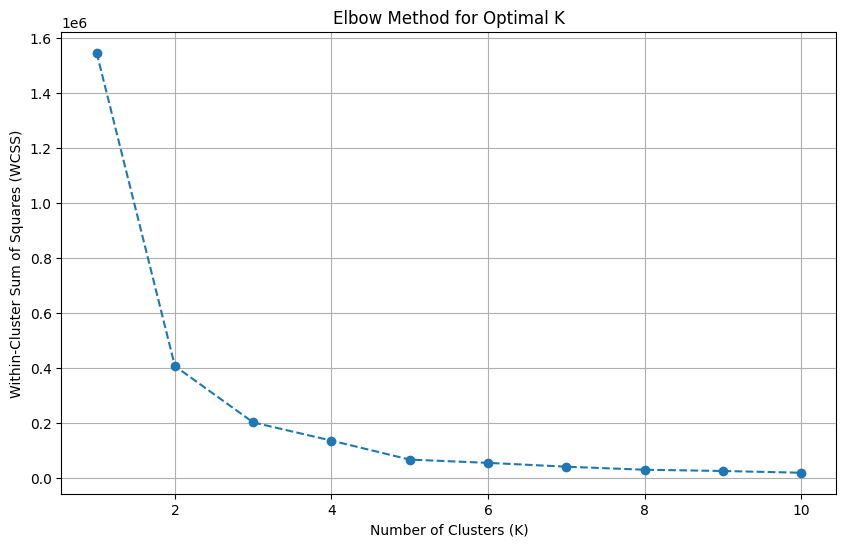

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init='auto')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

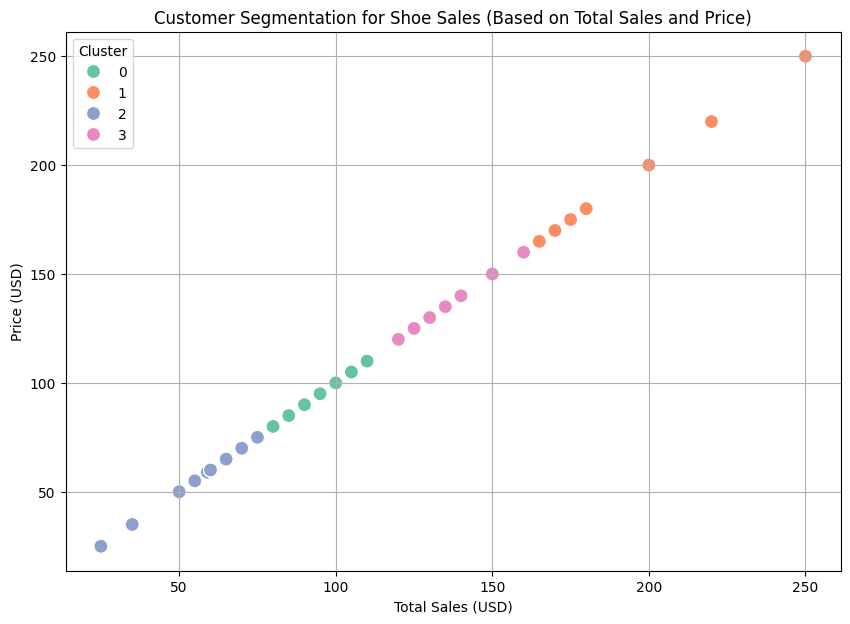

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Total_Sales',
    y='Price (USD)',
    hue='Cluster',
    data=df,
    palette='Set2',
    s=100
)
plt.title('Customer Segmentation for Shoe Sales (Based on Total Sales and Price)')
plt.xlabel('Total Sales (USD)')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [ ]:
df.to_csv('segmented_shoe_customers.csv', index=False)
print("DataFrame saved to 'segmented_shoe_customers.csv'")

DataFrame saved to 'segmented_shoe_customers.csv'
